
## Project: Predicting Boston Housing Prices
### Model Evaluation & Validation


## Getting Started
In this project, I evaluated the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing).

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
data


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [ ]:
 For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

In [47]:
# Minimum price of the data
minimum_price = min(prices)

# Maximum price of the data
maximum_price = max((prices))

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Analysis:
#1 As RM increases the price increases.
#2 Greater the value of LSTAT lesser the price of the houses in the neighbourhood
#3 Higher the PTRATION higher the prices of houses in the neighbourhood

----
## Developing a Model

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I used [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._



In [10]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data


In [12]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split as tts
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = tts(features, prices, test_size=0.20, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Training and Testing



Testing and training the data on the same set would lead to overfitting because of genralization.When we test the model on out of sample data we get to know the actual performance of the model.

----

## Analyzing Model Performance


### Learning Curves

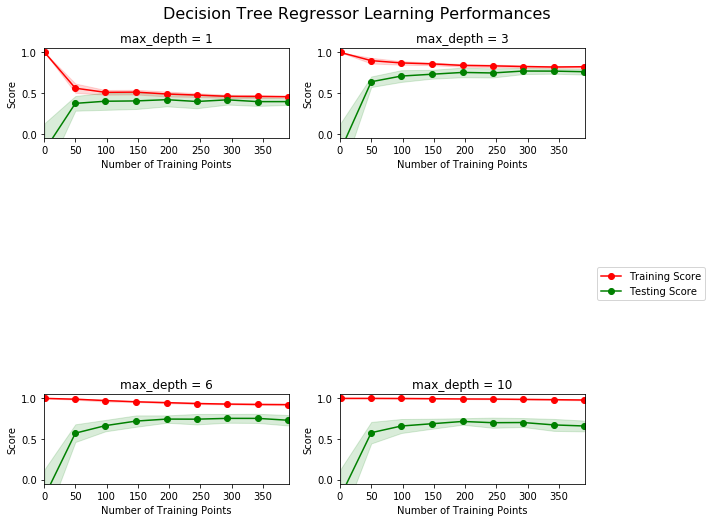

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data


At max_depth = 1, we would have a High Bias Scenario
We can see that the testing score increases with the number of observations.But,the testing score only increases to approximately 0.4, a low score,which illustrates that the model does not generalize well for new, unseen, data.
We can also notice that the training score decreases with the number of observations to a score of 0.4
This illustrates how the model does not seem to fit the data well.

Having more training points would not benefit the model as the model is underfitting the dataset. We should increase the model complexity to better fit the dataset.
The teting score has reached a plateau suggesting the model may not improve from adding more training points.

max_depth = 3
This is an ideal scenario
Testing score increases with training points and reaches 0.8 which is High score. This implies the model Generalizes well.
Training score decreases slightly when training points reachers 0.8 .The model Fits the dataset well, this imples there is no high bias or high variance problem and model fits and generalizes well. Adding more training points should help it become an even more ideal model
max_depth = 10  is a High Variance Scenario
Testing score increases with training points and reaches 0.7.The model does not generalize well
Training score is same with addition of training points with 1.0. The model Overfits the dataset.

max_depth = 6 is a High Variance Scenario
Testing score increases with training points with score of 0.75 and Training score decreases with training points at 0.9 which is a High score.The model overfits the dataset
If we add more training points this case becomes a ideal scenario.


### Complexity Curves

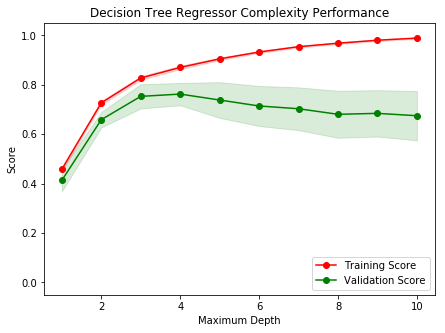

In [14]:
vs.ModelComplexity(X_train, y_train)

###  Bias-Variance Tradeoff


Maximum depth of 1: High Bias
Both training and testing scores are low. 
There is barely a gap between the training and testing scores.
This indicates the model is not fitting the dataset well and not generalizing well hence the model is suffering from high bias.
Maximum depth of 10: High Variance
Training score is high. Testing score is low
There is a substantial gap between the training and testing scores.
This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance.

### Best-Guess Optimal Model


The maximum depth of 4.
The training score has a plateau here, which inturn indicates the highest possible score for the model's ability to generalize to unseen data.
Gap between the training score and testing score does not seem to be substantial too, indicating that the model may not be suffering from a high variance scenario.

-----

## Evaluating Model Performance
In this final section of the project,I constructed a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

###  Grid Search


The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set[3] or evaluation on a held-out validation set.
https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search
https://www.quora.com/Machine-Learning-How-does-grid-search-work

### Cross-Validation



Technique to determine whether or model is making good predictions by simulating “out of sample” tests
Models are built and evaluated on different data sets
Helps to avoid overfitting and build models that are hopefully generalizable 
More reliable estimate of out-of-sample performance than train/test split.
Reduce the variance of a single trial of a train/test split.

### Implementation: Fitting a Model

In [43]:
#Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import make_scorer as ms
from sklearn.model_selection import GridSearchCV as gs


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = dtr()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : range(1, 11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = ms(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = gs (regressor , params , scoring=scoring_fnc , cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

###  Optimal Model


In [48]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices


In [45]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


client 1: Average poverty level and student-to-teacher ratio imples client 1 home price is reasonable.
client 2: Predicted  high poverty level and student-to-teacher ratio. Hence the value is low.
client 3:The mean and median prices are above average, nearing to the maximum price in the dataset, which illustrates client 3 has a high selling price

In [46]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Applicability

Data collected from a rural city may not be applicable as the Urban cities would have other features which differ rural from urban.
The learning algorithm learned from a very old dataset may or may not be set for current days data set depending on the features which we select
We developed our model with 3 features, and as days passed on we may get more information and features to train the data.